### Importing Packages


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from tqdm import tqdm
import scipy.stats
pd.options.mode.chained_assignment = None  # default='warn'

### Connecting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Getting Data


In [ ]:
NASDAQ_URL = 'https://query1.finance.yahoo.com/v7/finance/download/%5EIXIC?period1=1420070400&period2=1609372800&interval=1d&events=history&includeAdjustedClose=true'
NEWS_URL = 'https://dataverse.harvard.edu/file.xhtml?fileId=4460084&version=5.0#'

In [ ]:
nasdaq_data = pd.read_csv(NASDAQ_URL)

### Data Summary

In [ ]:
#Data Head
nasdaq_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1505,2020-12-23,12834.940430,12841.919922,12758.669922,12771.110352,12771.110352,7028650000
1506,2020-12-24,12791.540039,12833.549805,12767.639648,12804.730469,12804.730469,3305950000
1507,2020-12-28,12914.639648,12930.889648,12827.450195,12899.419922,12899.419922,5076340000
1508,2020-12-29,12965.389648,12973.330078,12821.959961,12850.219727,12850.219727,4680780000
1509,2020-12-30,12906.509766,12924.929688,12857.759766,12870.000000,12870.000000,5292210000


In [ ]:
nasdaq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1510 non-null   object 
 1   Open       1510 non-null   float64
 2   High       1510 non-null   float64
 3   Low        1510 non-null   float64
 4   Close      1510 non-null   float64
 5   Adj Close  1510 non-null   float64
 6   Volume     1510 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.7+ KB


In [ ]:
nasdaq_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,6952.699080,6994.793755,6906.494686,6954.426623,6954.426623,2.339913e+09
std,1952.717347,1969.128781,1933.271418,1953.214037,1953.214037,9.065136e+08
min,4218.810059,4293.220215,4209.759766,4266.839844,4266.839844,1.494100e+08
25%,5133.515137,5147.822632,5098.542724,5126.220092,5126.220092,1.817410e+09
50%,6870.539795,6900.179931,6815.895020,6868.739990,6868.739990,2.039735e+09
75%,7980.317627,8009.439941,7916.359985,7966.879883,7966.879883,2.403262e+09
max,12965.389648,12973.330078,12857.759766,12899.419922,12899.419922,7.693430e+09


### Preprocessing Data

In [ ]:
#Convert Date to Date Type
nasdaq_data['Date']=nasdaq_data['Date'].astype('datetime64')

In [ ]:
nasdaq_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
nasdaq_data = nasdaq_data.set_index(nasdaq_data['Date'])
idx = pd.date_range('01-01-2015', '12-12-2020')
nasdaq_data = nasdaq_data.reindex(idx)

In [ ]:
nasdaq_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2015-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,4760.240234,4777.009766,4698.109863,4726.810059,4726.810059,1.435150e+09
2015-01-03,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,2015-01-05,4700.339844,4702.770020,4641.459961,4652.569824,4652.569824,1.794470e+09
2015-01-06,2015-01-06,4666.850098,4667.330078,4567.589844,4592.740234,4592.740234,2.167320e+09
2015-01-07,2015-01-07,4626.839844,4652.720215,4613.899902,4650.470215,4650.470215,1.957950e+09
2015-01-08,2015-01-08,4689.540039,4741.379883,4688.020020,4736.189941,4736.189941,2.105450e+09
2015-01-09,2015-01-09,4744.470215,4744.709961,4681.240234,4704.069824,4704.069824,1.715830e+09
2015-01-10,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Removing NULL Values (not required)
#Normalizing the data (not required)

In [ ]:
#To Do
# 1. Create a months column

### Visualizing Bitcoin Prices

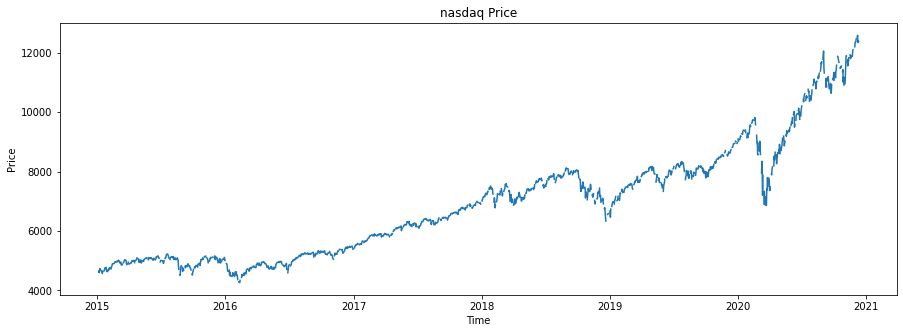

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nasdaq_data['Date'],nasdaq_data['Close'])
plt.title('nasdaq Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

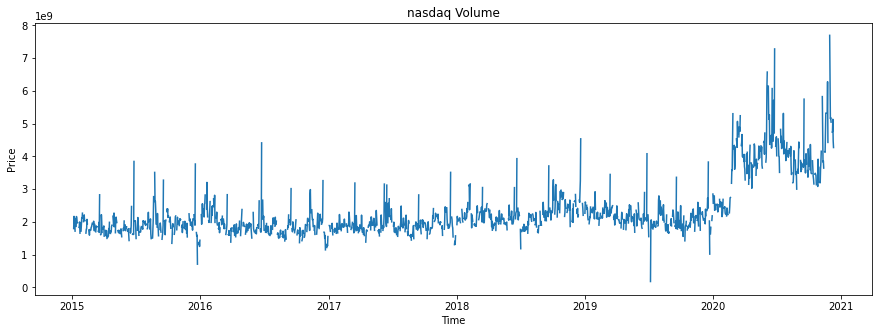

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nasdaq_data['Date'],nasdaq_data['Volume'])
plt.title('nasdaq Volume')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

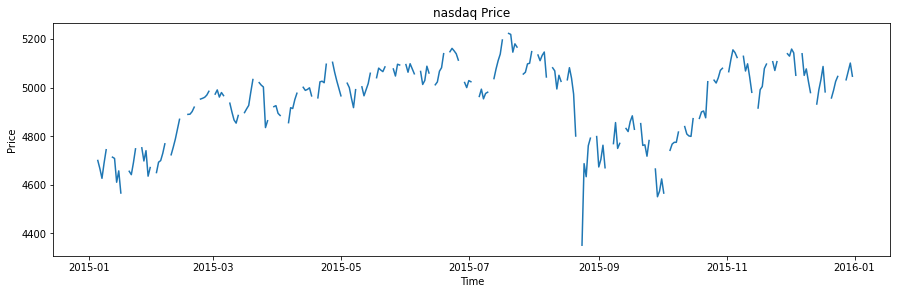

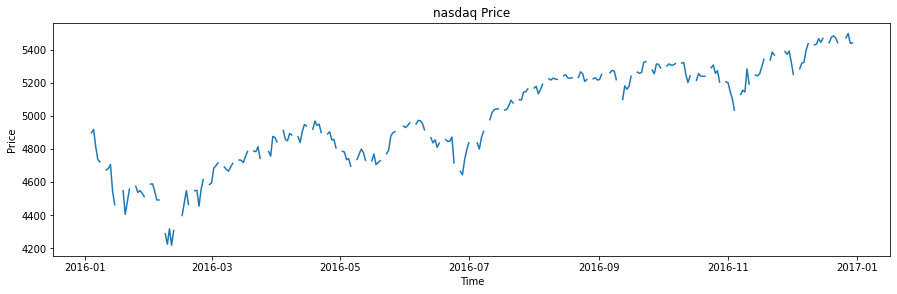

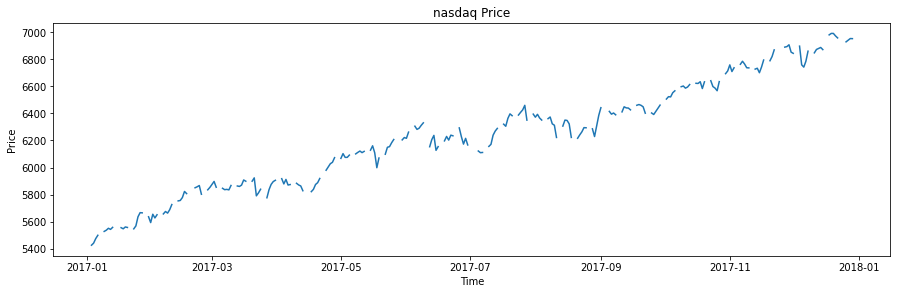

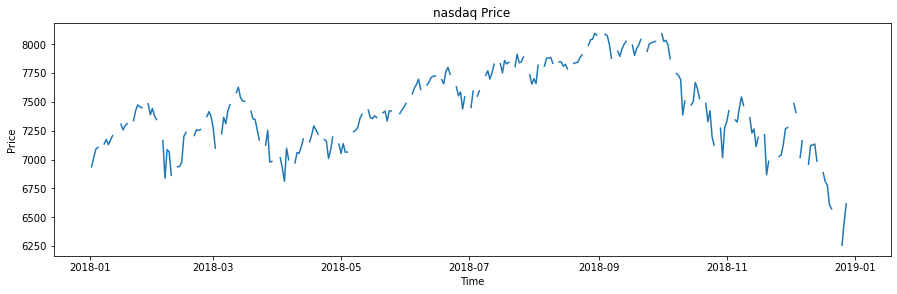

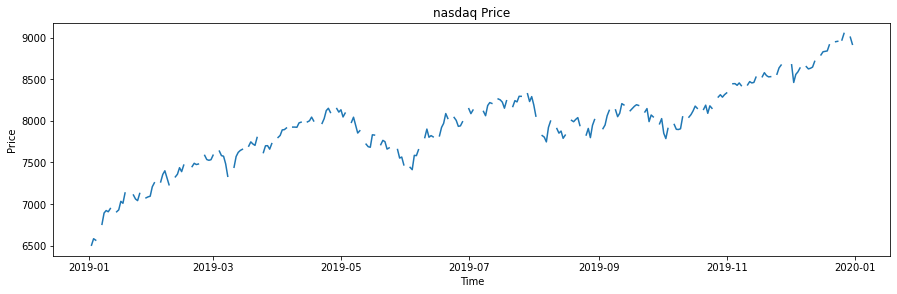

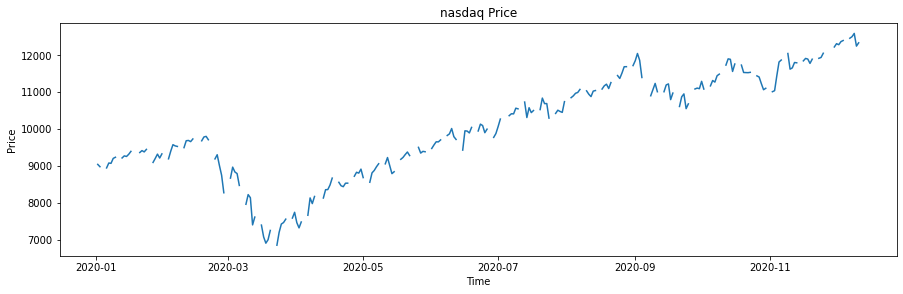

In [ ]:
plt.rcParams["figure.figsize"] = (15,30)
for i in range(6):
  plt.subplot(6, 1, i+1)
  plt.plot(nasdaq_data[str(i+2015)+'-01-01':str(i+2015)+'-12-31']['Date'],nasdaq_data[str(i+2015)+'-01-01':str(i+2015)+'-12-31']['Open'])
  plt.title('nasdaq Price')
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.show()

### Correlation Between Price and Volume

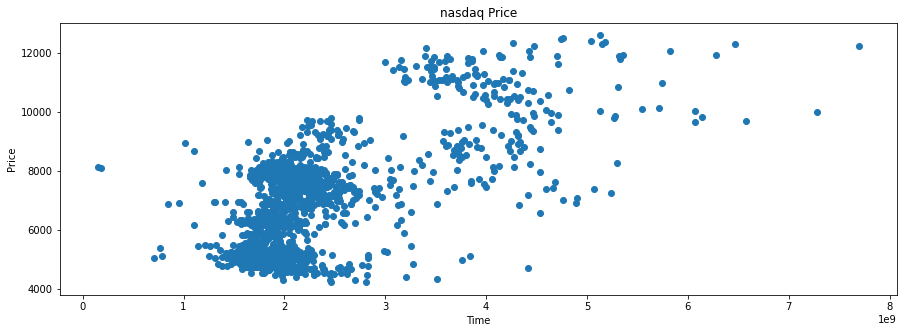

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(nasdaq_data['Volume'],nasdaq_data['Open'])
plt.title('nasdaq Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

We can say that as market volume increased, the nasdaq Volatality also increased

### Importing News Dataset

In [ ]:
news = pd.read_csv('/content/drive/MyDrive/DataVis Data/abcnews-date-text.csv')

### Preprocessing News Data

In [ ]:
news.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:
news.rename(columns={'publish_date':'Date','headline_text':'Headline'},inplace=True)
news.head()

,Date,Headline
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:
news.dtypes

Date         int64
Headline    object
dtype: object

In [ ]:
#Converts float to Date
news['Date']=pd.to_datetime(news['Date'],format='%Y%m%d')
news.dtypes

Date        datetime64[ns]
Headline            object
dtype: object

In [ ]:
news.head()

,Date,Headline
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [ ]:
news.set_index('Date',inplace=True)
news = news['2015-01-01':'2020-12-31']
news.head()

,Headline
Date,
2015-01-01,1000s celebrate nye in adelaide
2015-01-01,1984 qld cabinet papers released
2015-01-01,2014 year in interactive storytelling
2015-01-01,35 dead in shanghai new year stampede
2015-01-01,airasia qz8501 first two bodies arrive in sura...


### Finding News Polarity

In [ ]:
#Vader Algoritm
blobs = [TextBlob(news['Headline'][i]) for i in tqdm(range(news.shape[0]))]
polarity = [blob.polarity for blob in tqdm(blobs)]

100%|██████████| 300778/300778 [00:50<00:00, 5909.06it/s]


In [ ]:
news['Polarity'] = polarity

In [ ]:
news.head()

,Headline,Polarity
Date,,
2015-01-01,1000s celebrate nye in adelaide,0.000000
2015-01-01,1984 qld cabinet papers released,0.000000
2015-01-01,2014 year in interactive storytelling,0.000000
2015-01-01,35 dead in shanghai new year stampede,-0.031818
2015-01-01,airasia qz8501 first two bodies arrive in sura...,0.250000


### Grouping News Data by Date and finding mean Polarity

In [ ]:
news_polarities=news.groupby('Date').mean()
news_polarities.tail()

,Polarity
Date,
2020-12-27,-0.007455
2020-12-28,0.023704
2020-12-29,0.009022
2020-12-30,0.049853
2020-12-31,0.044833


### Normalizing nasdaq Data


In [ ]:
nasdaq_data_2015 = nasdaq_data['2015-01-01':'2015-12-31']
nasdaq_data_2016 = nasdaq_data['2016-01-01':'2016-12-31']
nasdaq_data_2017 = nasdaq_data['2017-01-01':'2017-12-31']
nasdaq_data_2018 = nasdaq_data['2018-01-01':'2018-12-31']
nasdaq_data_2019 = nasdaq_data['2019-01-01':'2019-12-31']
nasdaq_data_2020 = nasdaq_data['2020-01-01':'2020-12-31']

In [ ]:
#To DO: Find for 2016 to 2020
nasdaq_data_2015['Open Normalized'] = (nasdaq_data_2015['Open'] - nasdaq_data_2015['Open'].mean())/(nasdaq_data_2015['Open'].std())
nasdaq_data_2016['Open Normalized'] = (nasdaq_data_2016['Open'] - nasdaq_data_2016['Open'].mean())/(nasdaq_data_2016['Open'].std())
nasdaq_data_2017['Open Normalized'] = (nasdaq_data_2017['Open'] - nasdaq_data_2017['Open'].mean())/(nasdaq_data_2017['Open'].std())
nasdaq_data_2018['Open Normalized'] = (nasdaq_data_2018['Open'] - nasdaq_data_2018['Open'].mean())/(nasdaq_data_2018['Open'].std())
nasdaq_data_2019['Open Normalized'] = (nasdaq_data_2019['Open'] - nasdaq_data_2019['Open'].mean())/(nasdaq_data_2019['Open'].std())
nasdaq_data_2020['Open Normalized'] = (nasdaq_data_2020['Open'] - nasdaq_data_2020['Open'].mean())/(nasdaq_data_2020['Open'].std())

In [ ]:
#To DO: Find for 2016 to 2020
nasdaq_data_2015['Volume Normalized'] = (nasdaq_data_2015['Volume'] - nasdaq_data_2015['Volume'].mean())/(nasdaq_data_2015['Volume'].std())
nasdaq_data_2016['Volume Normalized'] = (nasdaq_data_2016['Volume'] - nasdaq_data_2016['Volume'].mean())/(nasdaq_data_2016['Volume'].std())
nasdaq_data_2017['Volume Normalized'] = (nasdaq_data_2017['Volume'] - nasdaq_data_2017['Volume'].mean())/(nasdaq_data_2017['Volume'].std())
nasdaq_data_2018['Volume Normalized'] = (nasdaq_data_2018['Volume'] - nasdaq_data_2018['Volume'].mean())/(nasdaq_data_2018['Volume'].std())
nasdaq_data_2019['Volume Normalized'] = (nasdaq_data_2019['Volume'] - nasdaq_data_2019['Volume'].mean())/(nasdaq_data_2019['Volume'].std())
nasdaq_data_2020['Volume Normalized'] = (nasdaq_data_2020['Volume'] - nasdaq_data_2020['Volume'].mean())/(nasdaq_data_2020['Volume'].std())

### Normalizing News Polarities

In [ ]:
news_polarities = (news_polarities - news_polarities.mean())/(news_polarities.std())
news_p = news_polarities.reset_index()
news_p.head()

,Date,Polarity
0,2015-01-01,0.486202
1,2015-01-02,0.525448
2,2015-01-03,-0.125111
3,2015-01-04,-0.701990
4,2015-01-05,-0.720196


### Plotting Polarity Vs Price (Normalized)

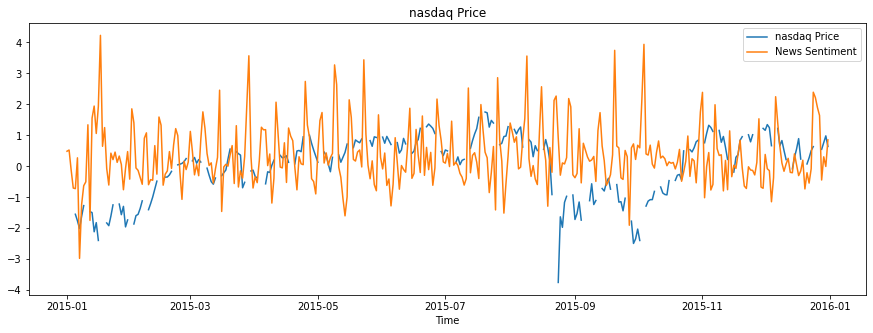

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nasdaq_data_2015['Date'],nasdaq_data_2015['Open Normalized'], label='nasdaq Price')
plt.plot(news_polarities['2015-01-01':'2015-12-31'], label='News Sentiment')
plt.title('nasdaq Price')
plt.xlabel('Time')
plt.legend()
plt.show()

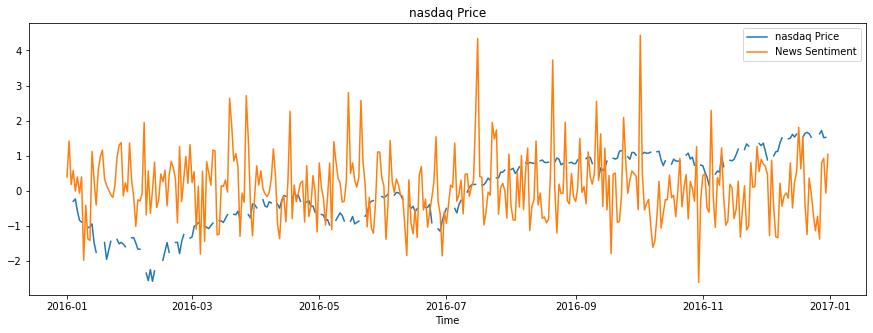

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nasdaq_data_2016['Date'],nasdaq_data_2016['Open Normalized'], label='nasdaq Price')
plt.plot(news_polarities['2016-01-01':'2016-12-31'], label='News Sentiment')
plt.title('nasdaq Price')
plt.xlabel('Time')
plt.legend()
plt.show()

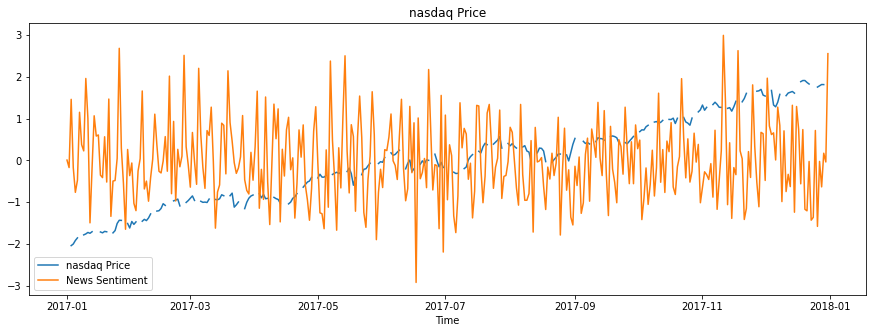

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nasdaq_data_2017['Date'],nasdaq_data_2017['Open Normalized'], label='nasdaq Price')
plt.plot(news_polarities['2017-01-01':'2017-12-31'], label='News Sentiment')
plt.title('nasdaq Price')
plt.xlabel('Time')
plt.legend()
plt.show()

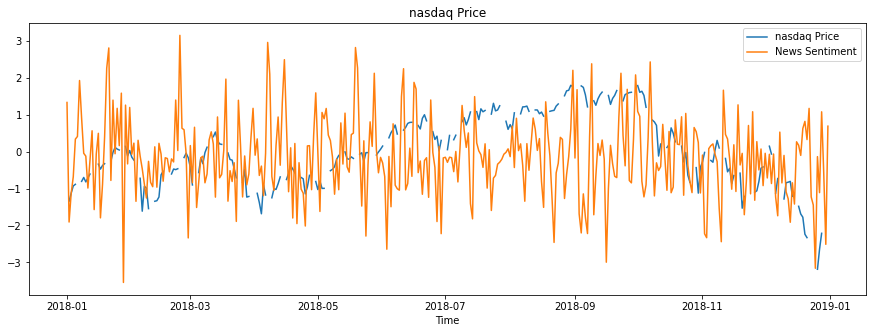

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nasdaq_data_2018['Date'],nasdaq_data_2018['Open Normalized'], label='nasdaq Price')
plt.plot(news_polarities['2018-01-01':'2018-12-31'], label='News Sentiment')
plt.title('nasdaq Price')
plt.xlabel('Time')
plt.legend()
plt.show()

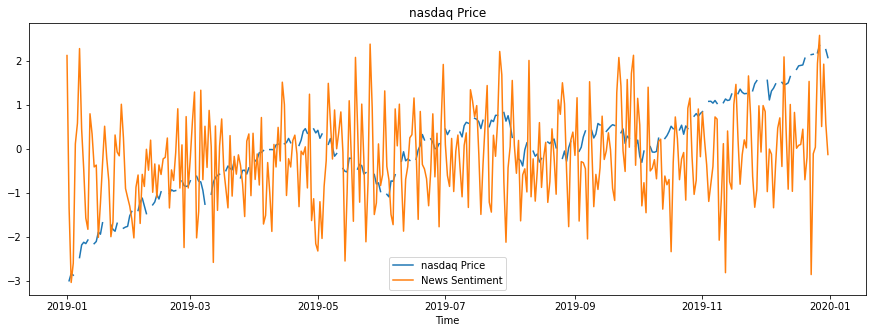

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nasdaq_data_2019['Date'],nasdaq_data_2019['Open Normalized'], label='nasdaq Price')
plt.plot(news_polarities['2019-01-01':'2019-12-31'], label='News Sentiment')
plt.title('nasdaq Price')
plt.xlabel('Time')
plt.legend()
plt.show()

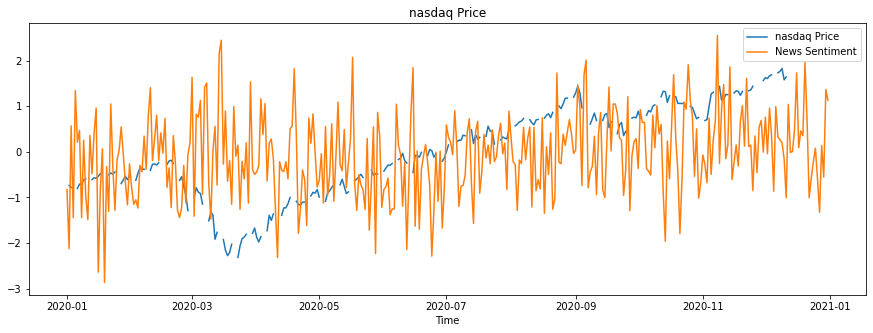

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nasdaq_data_2020['Date'],nasdaq_data_2020['Open Normalized'], label='nasdaq Price')
plt.plot(news_polarities['2020-01-01':'2020-12-31'], label='News Sentiment')
plt.title('nasdaq Price')
plt.xlabel('Time')
plt.legend()
plt.show()

### Scatter Plot for Polarity vs Price

In [ ]:
nasdaq_data_2015.shape

(365, 9)

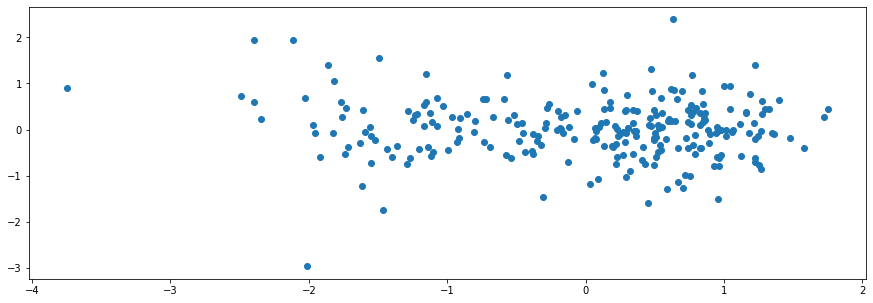

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(nasdaq_data_2015['Open Normalized'], news_polarities['2015-01-01':'2015-12-31'])
plt.show()

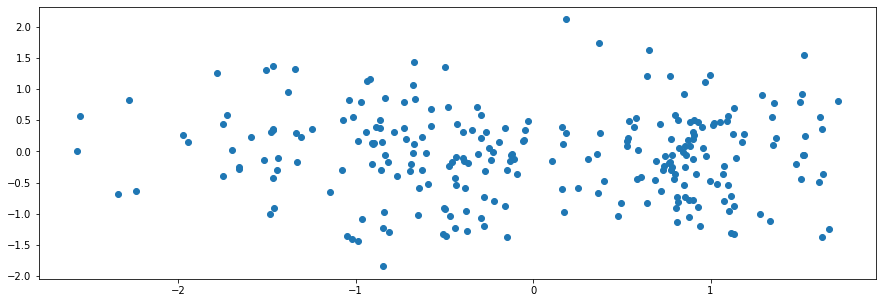

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(nasdaq_data_2016['Open Normalized'], news_polarities['2016-01-01':'2016-12-31'])
plt.show()

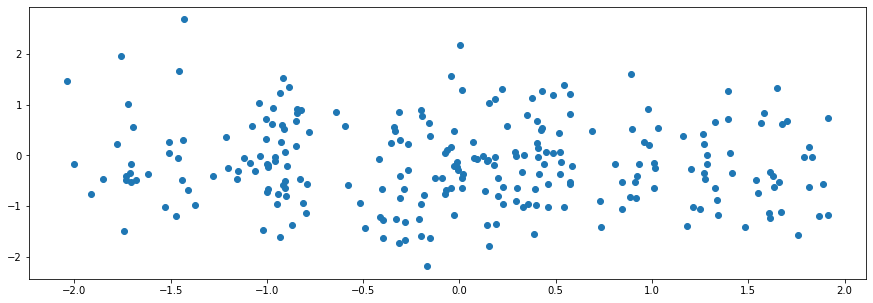

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(nasdaq_data_2017['Open Normalized'], news_polarities['2017-01-01':'2017-12-31'])
plt.show()

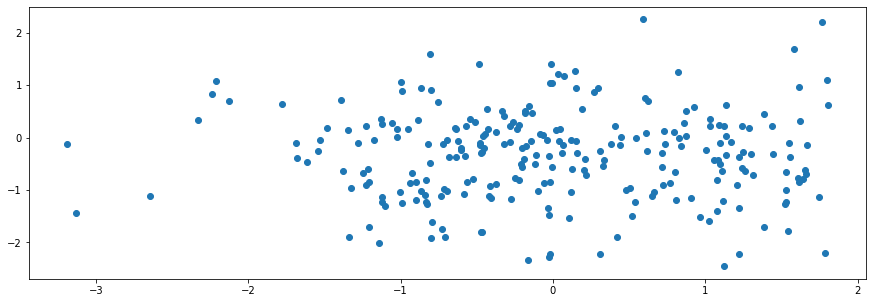

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(nasdaq_data_2018['Open Normalized'], news_polarities['2018-01-01':'2018-12-31'])
plt.show()

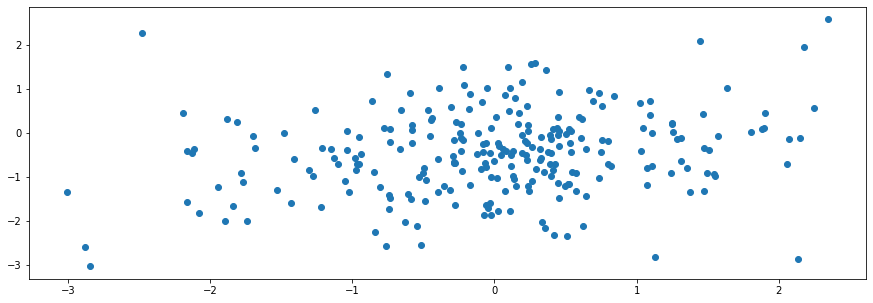

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(nasdaq_data_2019['Open Normalized'], news_polarities['2019-01-01':'2019-12-31'])
plt.show()

### Polarity vs Volume

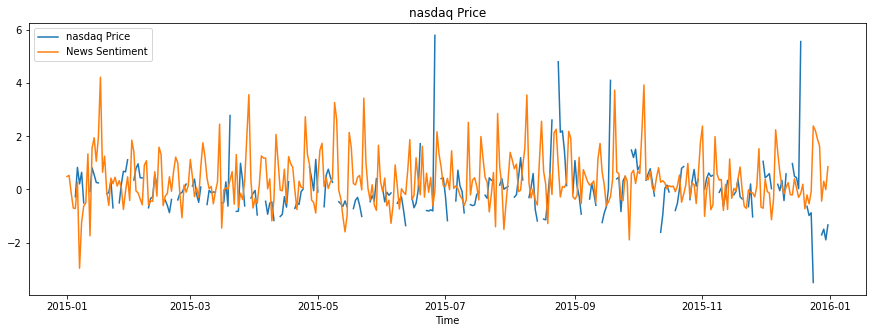

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nasdaq_data_2015['Date'],nasdaq_data_2015['Volume Normalized'], label='nasdaq Price')
plt.plot(news_polarities['2015-01-01':'2015-12-31'], label='News Sentiment')
plt.title('nasdaq Price')
plt.xlabel('Time')
plt.legend()
plt.show()

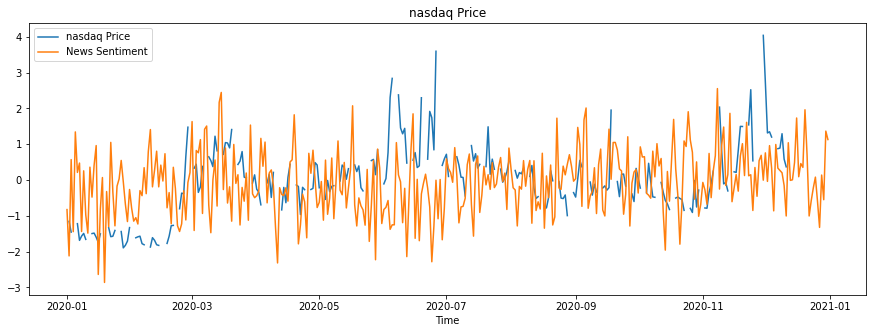

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(nasdaq_data_2020['Date'],nasdaq_data_2020['Volume Normalized'], label='nasdaq Price')
plt.plot(news_polarities['2020-01-01':'2020-12-31'], label='News Sentiment')
plt.title('nasdaq Price')
plt.xlabel('Time')
plt.legend()
plt.show()

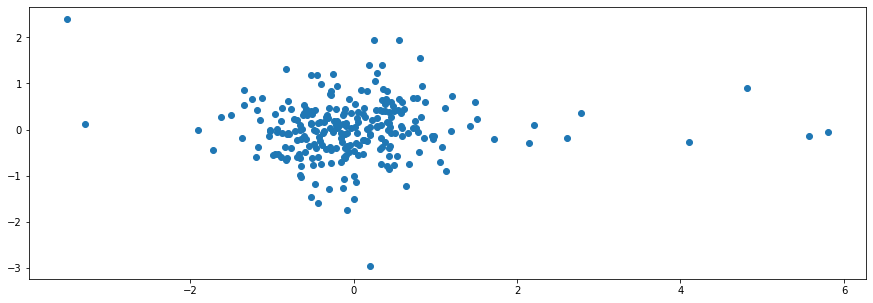

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(nasdaq_data_2015['Volume Normalized'], news_polarities['2015-01-01':'2015-12-31'])
plt.show()

In [ ]:
nasdaq_data_2020['Open Normalized'].fillna(nasdaq_data_2020['Open Normalized'].mean(),inplace=True)
nasdaq_data_2020['Volume Normalized'].fillna(nasdaq_data_2020['Volume Normalized'].mean(),inplace=True)

In [ ]:
nasdaq_data_2015['Open Normalized'].fillna(nasdaq_data_2015['Open Normalized'].mean(),inplace=True)
nasdaq_data_2015['Volume Normalized'].fillna(nasdaq_data_2015['Volume Normalized'].mean(),inplace=True)

In [ ]:
nasdaq_data_2017['Open Normalized'].fillna(nasdaq_data_2017['Open Normalized'].mean(),inplace=True)
nasdaq_data_2017['Volume Normalized'].fillna(nasdaq_data_2017['Volume Normalized'].mean(),inplace=True)

In [ ]:
nasdaq_data_2018['Open Normalized'].fillna(nasdaq_data_2018['Open Normalized'].mean(),inplace=True)
nasdaq_data_2018['Volume Normalized'].fillna(nasdaq_data_2018['Volume Normalized'].mean(),inplace=True)

In [ ]:
nasdaq_data_2019['Open Normalized'].fillna(nasdaq_data_2019['Open Normalized'].mean(),inplace=True)
nasdaq_data_2019['Volume Normalized'].fillna(nasdaq_data_2019['Volume Normalized'].mean(),inplace=True)

### Covarieance Volume and Sentiment

In [ ]:
scipy.stats.pearsonr(news_polarities['2015-01-01':'2015-12-31'].to_numpy().reshape(365,), nasdaq_data_2015['Volume Normalized'].to_numpy().reshape(365,))

(0.006384593043466532, 0.9032472349608492)

In [ ]:
scipy.stats.pearsonr(news_polarities['2017-01-01':'2017-12-31'].to_numpy().reshape(365,), nasdaq_data_2017['Volume Normalized'].to_numpy().reshape(365,))

(0.06842692244321807, 0.1921177987583657)

In [ ]:
scipy.stats.pearsonr(news_polarities['2018-01-01':'2018-12-31'].to_numpy().reshape(365,), nasdaq_data_2018['Volume Normalized'].to_numpy().reshape(365,))

(-0.02805438370510455, 0.5931720571674636)

In [ ]:
scipy.stats.pearsonr(news_polarities['2019-01-01':'2019-12-31'].to_numpy().reshape(365,), nasdaq_data_2019['Volume Normalized'].to_numpy().reshape(365,))

(-0.0653753586416303, 0.2127483575611141)

### Covarience Price and Sentiment

In [ ]:
scipy.stats.pearsonr(news_polarities['2015-01-01':'2015-12-31'].to_numpy().reshape(365,), nasdaq_data_2015['Open Normalized'].to_numpy().reshape(365,))

(-0.038999132446393595, 0.45760014608792543)

In [ ]:
scipy.stats.pearsonr(news_polarities['2017-01-01':'2017-12-31'].to_numpy().reshape(365,), nasdaq_data_2017['Open Normalized'].to_numpy().reshape(365,))

(-0.051505845917801704, 0.3264477719609154)

In [ ]:
scipy.stats.pearsonr(news_polarities['2018-01-01':'2018-12-31'].to_numpy().reshape(365,), nasdaq_data_2018['Open Normalized'].to_numpy().reshape(365,))

(-0.007914686990476252, 0.8802174354413993)

In [ ]:
scipy.stats.pearsonr(news_polarities['2019-01-01':'2019-12-31'].to_numpy().reshape(365,), nasdaq_data_2019['Open Normalized'].to_numpy().reshape(365,))

(0.1720955477953455, 0.0009624934444312247)

## Conclusion

As the impact of social media and internet is increasing, so is the dependance of Crypto Market is increasing on News

### Prediction Model with LTSM and RNN